# Judging the authenticity of audio stories - based on multi method fusion

## 1 Author
**Student Name**:  Yijie Ma

**Student ID**:  221169472

## 2 Problem formulation

The goal of this project is to address a machine learning problem, namely predicting whether a narrated story is real or fictional. Specifically, we need to build a machine learning model where the input is a 3-5 minute audio recording, and the output is the category of the story: True Story or Deceptive Story.

Interesting points:

1. **Complexity**: Determining whether a story is real or fictional involves multiple aspects such as voice features, expression styles, and word choices. The audio needs to be analyzed from various angles to uncover patterns distinguishing real stories from deceptive ones, in order to improve the accuracy of the recognition.
  
2. **Challenge**: Training the model on a limited dataset provides only a small amount of information, which makes overfitting a concern. A model that is too complex cannot be used.

## 3 Methodology

The methodology of this project includes the training tasks, validation tasks, and model performance evaluation criteria, which are described as follows:

#### **Training Tasks**
1. **Feature Extraction**:  
   - **Audio Feature Extraction**: Use the `librosa` library to extract time-domain and frequency-domain features from the audio data, including:  
     - **MFCC (Mel-Frequency Cepstral Coefficients)**: Used to capture the spectral features of the audio.  
     - **ZCR (Zero-Crossing Rate)**: Used to reflect the frequency of changes in the audio signal.  
     - **RMS (Root Mean Square Energy)**: Used to represent the intensity of the audio signal.  
   - **Text Feature Extraction**: After converting the audio to text via speech recognition, use **TfidfVectorizer** to extract text features, limiting the feature dimension to 17. TF-IDF measures the importance of words in the text, highlighting key features.  

2. **Model Training**:  
   - Audio and text features are used to train different classifiers:  
     - **Audio Features**: Train using K-Nearest Neighbors (kNN) and Gaussian Naive Bayes (GaussianNB) classifiers.  
     - **Text Features**: Train using Logistic Regression and Random Forest classifiers.  
   - During the training phase, the model learns the relationship between audio/text features and labels (True Story or Deceptive Story) to distinguish the categories of the input data.  

#### **Validation Tasks**  
- The dataset is split into a training set and a testing set (80% training, 20% testing) using **train_test_split**.  
- During the validation phase, the trained models are applied to the test set, and the prediction results and accuracy for each model are output.  

#### **Model Performance Evaluation**  
The main evaluation criteria for model performance include:  
1. **Accuracy**:  
   - For each classifier, calculate its classification accuracy on the test set.  
2. **Confusion Matrix**:  
   - Use the confusion matrix to evaluate the classification performance of the model, showing the match between the true labels and the predicted labels, helping to analyze the model's misclassifications and accuracy.  
3. **Weighted Voting Mechanism**:  
   - In the final prediction phase, apply a weighted voting mechanism based on the accuracy of each model, with the weight proportional to the model's accuracy.  
   - Each model predicts for the test samples, and the voting results are weighted and aggregated to produce the final classification result.  

#### **Other Tasks**  
1. **Model Saving and Loading**:  
   - Use the `joblib` library to save the trained models and feature extractors, and reload them during the prediction phase to process new test data.  
2. **Structured Output Results**:  
   - The prediction results are saved to a file, with each test sample corresponding to a prediction result. A result of `true` indicates a True Story, and `false` indicates a Deceptive Story.  

Through the above methodology, this project implements joint modeling of audio and text data, trains and validates using multiple classifiers, and ultimately uses a weighted voting mechanism to obtain the overall classification results.

## 4 Implemented ML prediction pipelines

In this project, we have designed multiple machine learning prediction pipelines that process audio and text data through various stages. The input, output, and data flow format for each stage are as follows:

### Overview
The machine learning prediction pipeline consists of the following key stages:

- **Feature Extraction Stage (Transformation Stage)**
- **Model Training Stage (Model Stage)**
- **Ensemble Stage**

Each stage has specific tasks, from data preprocessing and feature extraction to model training and ensemble voting, ultimately achieving the prediction of the authenticity of audio files. Below, we will describe the tasks and data processing flow for each stage in detail.

### 4.1 Feature Extraction Stage (Transformation Stage)

**Advantages**:
1. **Diversity of Audio Feature Extraction**:
   - **MFCC (Mel-Frequency Cepstral Coefficients)**: MFCC is one of the most widely used features in audio processing. It simulates the auditory perception of the human ear, particularly excelling in speech and music analysis. By extracting the spectral features of audio, MFCC effectively retains key information, especially in speech or music where frequency variations are important for recognition.
   - **Zero-Crossing Rate (ZCR)**: ZCR reflects the high-frequency components or instantaneous changes of an audio signal. It is an effective feature in speech activity detection and noise reduction tasks, providing dynamic information about the signal and performing well in distinguishing between speech and non-speech segments.
   - **RMS (Root Mean Square Energy)**: RMS energy reflects the strength of the audio signal, capturing the loudness variation. In noisy environments, RMS energy helps differentiate the intensity of sounds, assisting in distinguishing between different types of sounds (e.g., speech vs. noise).

2. **Effectiveness of Text Feature Extraction**:
   - **TF-IDF**: TF-IDF is one of the most commonly used feature extraction methods in text analysis. It filters out common words with minimal contribution to classification by calculating the importance of each word in the text. Unlike simple word frequency statistics, TF-IDF better identifies distinguishing words, making the features more concise and effective.
   - **Simplicity of Text Representation**: TF-IDF features are controllable in terms of dimensions. By setting the `max_features` parameter, the feature space size can be managed, avoiding redundant features and improving computational efficiency.
   - **Robustness for Small Datasets**: For smaller datasets, TF-IDF features effectively capture the core information in the text, bypassing computational bottlenecks that arise in large-scale data processing.

With these two feature extraction methods, we can comprehensively capture the key information in both audio and text, enabling subsequent model training to learn meaningful patterns.

### 4.2 Model Training Stage (Model Stage)

**Advantages**:
1. **Choice of Audio Feature Models**:
   - **KNN (K-Nearest Neighbors)**: KNN is a simple instance-based classification algorithm. It predicts based on the similarity between a new sample and the training samples. KNN works effectively with audio features, especially when there is clear similarity between samples. It relies less on training data and adapts well to non-linear relationships.
   - **Gaussian Naive Bayes (GaussianNB)**: GaussianNB assumes that each feature follows a Gaussian distribution, making it effective when features are correlated. Audio features often have continuity and statistical regularities, which GaussianNB can capture, providing good classification performance even with noisy data.

2. **Choice of Text Feature Models**:
   - **Logistic Regression**: Logistic regression is a commonly used linear classification model for text classification tasks that are linearly separable. It maps input text features into probability space and provides strong interpretability. For text data, logistic regression captures important information in a simplified manner, especially when the feature dimension is small, leading to high classification performance.
   - **Random Forest**: Random Forest is an ensemble learning method based on decision trees, which improves classification accuracy by aggregating the results of multiple trees. It handles non-linear relationships between features and is robust to outliers and noise, making it stable in complex tasks.

By choosing these models, we can utilize different classifiers for processing audio and text features, enabling efficient classification of input data and improving the overall model's accuracy and robustness.

### 4.3 Ensemble Stage (Ensemble Stage)

**Advantages**:
1. **Advantages of Weighted Voting Mechanism**:
   - **Improved Accuracy**: By aggregating the predictions of multiple models, the strengths of each model are combined, leading to improved overall prediction accuracy. The weight of each model's vote is related to its performance on the training set (accuracy), meaning that higher accuracy models have a greater influence on the final prediction.
   - **Reduced Overfitting**: Ensemble methods balance the bias and variance of individual models, effectively reducing the risk of overfitting. Especially with small datasets, combining multiple models increases generalization ability, improving performance on unseen test data.
   - **Enhanced Robustness**: Ensemble methods reduce a single model's sensitivity to noise, improving the model's adaptability to different data distributions. By voting across multiple models, errors caused by data bias or overfitting in a single model are minimized.

Through the ensemble approach, the collaboration of multiple models not only improves classification accuracy but also enhances the stability and robustness of the model across different tasks. This is particularly advantageous when dealing with complex audio and text data.

## 5 Dataset

In this project, we will use a dataset based on the **MLEnd Deception Dataset** to build and evaluate the model. The construction, partitioning, and validation of the dataset will directly impact the model's performance and evaluation results, so it is essential to ensure the dataset's quality, independence, and representativeness.

#### **Dataset Construction**

We will use the audio dataset from the **CBU0521DD_stories** folder, which contains various stories, each labeled with its category, indicating whether it is a **True Story** or **Deceptive Story**, as well as the language category. We will extract the audio files and their corresponding labels, and then use a speech recognition tool (such as Whisper) to convert the audio into text data, which will be further processed to extract text features.

#### **Training and Validation Set Partitioning**

- **Dataset Partitioning**: We will split the dataset into a **training set** and a **validation set**, with a typical split of **80% for training** and **20% for testing**. This will be done using `train_test_split` to ensure randomness in the data. During this split, we will ensure that both categories (True Story and Deceptive Story) are reasonably represented in both the training and validation sets.
  
- **Independence and IID Samples**: When partitioning the data, we will ensure that there is no overlap between the training and testing sets, and that the data samples are **Independent and Identically Distributed (IID)**. This ensures the generalization ability of the model.

#### **Dataset Limitations**

- **Dataset Size**: Since the **CBU0521DD_stories** dataset is relatively small (only 100 samples), this may lead to **overfitting** during model training. To mitigate this, we will control the number of features used in the model.

Through these methods, we ensure that the constructed dataset not only meets the requirements for model training but also helps us better understand and evaluate the model's performance.

## 6 Experiments and results

### 6.1 Import related modules

In [1]:
import os
import numpy as np
import pandas as pd
import librosa
import whisper
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt

### 6.2 Audio to text conversion
Call a library that converts speech to text.

In [2]:
def audio_to_text(audio_path, output_text_path):
    # Using Whisper base model and GPU acceleration
    model = whisper.load_model("base").to("cuda")
    audio = whisper.load_audio(audio_path)
    audio = whisper.pad_or_trim(audio)
    # Obtain the conversion result
    result = model.transcribe(audio)
    text = result['text']

    # Save transcribed text
    with open(output_text_path, "w") as f:
        f.write(text)
    return text

### 6.3 Extract audio features

In [3]:
def extract_audio_features(file_path):
    # Loading audio files using the librosa library
    y, sr = librosa.load(file_path, sr=None)
    # Calculate Mel frequency cepstral coefficients
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
    # Calculate the zero crossing rate
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))
    # Calculate root mean square
    rms = np.mean(librosa.feature.rms(y=y))
    # Splicing to obtain audio features
    return np.hstack([mfcc, zcr, rms])

### 6.4 Extract text features

In [4]:
def extract_text_features(texts):
    vectorizer = TfidfVectorizer(max_features=17)
    return vectorizer.fit_transform(texts).toarray()

### 6.5 Classification and voting mechanism (with added weights)

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib

def train_and_evaluate(X_text, X_audio, y, model_save_path=None):
    # Split the data into training and test sets (80% training, 20% testing)
    X_text_train, X_text_test, X_audio_train, X_audio_test, y_train, y_test = train_test_split(
        X_text, X_audio, y, test_size=0.2, random_state=32
    )
    print(f"Number of text features: {X_text_train.shape[1]}")
    print(f"Audio feature count: {X_audio_train.shape[1]}")

    # Audio classifiers
    scaler = StandardScaler()
    # Standardizing audio features (scaling them to have mean=0 and std=1)
    X_audio_train = scaler.fit_transform(X_audio_train)
    X_audio_test = scaler.transform(X_audio_test)

    # Models for audio classification: kNN and Gaussian Naive Bayes
    models_audio = {
        "kNN": KNeighborsClassifier(n_neighbors=5),
        "GaussianNB": GaussianNB(),
    }

    predictions_audio = {}
    accuracy_audio = {}
    fpr_audio, tpr_audio, roc_auc_audio = {}, {}, {}

    for name, model in models_audio.items():
        print(f"Training {name} (Audio features)...")
        model.fit(X_audio_train, y_train)
        pred = model.predict(X_audio_test)
        predictions_audio[name] = pred
        accuracy = accuracy_score(y_test, pred)
        accuracy_audio[name] = accuracy
        print(f"{name} (Audio features) Accuracy: {accuracy:.2f}")

        # ROC curve data
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_audio_test)[:, 1])
        roc_auc = auc(fpr, tpr)
        fpr_audio[name], tpr_audio[name], roc_auc_audio[name] = fpr, tpr, roc_auc

    # Text classifiers using Logistic Regression and Random Forest
    models_text = {
        "LogisticRegression": LogisticRegression(max_iter=1000),
        "RandomForest": RandomForestClassifier(n_estimators=15, random_state=32),
    }

    predictions_text = {}
    accuracy_text = {}
    fpr_text, tpr_text, roc_auc_text = {}, {}, {}

    for name, model in models_text.items():
        print(f"Training {name} (Text features)...")
        model.fit(X_text_train, y_train)
        pred = model.predict(X_text_test)
        predictions_text[name] = pred
        accuracy = accuracy_score(y_test, pred)
        accuracy_text[name] = accuracy
        print(f"{name} (Text features) Accuracy: {accuracy:.2f}")

        # ROC curve data
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_text_test)[:, 1])
        roc_auc = auc(fpr, tpr)
        fpr_text[name], tpr_text[name], roc_auc_text[name] = fpr, tpr, roc_auc

    # Combine the accuracy of all models (text and audio)
    accuracies = {**accuracy_text, **accuracy_audio}

    # Voting mechanism for final prediction
    final_predictions = []
    for i in range(len(y_test)):
        votes = []
        for name, pred in {**predictions_text, **predictions_audio}.items():
            weight = accuracies.get(name, 0)
            votes.extend([pred[i]] * int(weight * 10))
        # Extend the votes list by the weight factor
        final_predictions.append(1 if votes.count(1) > votes.count(0) else 0)

    # Output the final accuracy after voting
    accuracy = accuracy_score(y_test, final_predictions)
    print(f"Final voting classification accuracy: {accuracy:.2f}")

    # Plot the confusion matrix to visualize the classification performance
    cm = confusion_matrix(y_test, final_predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Deceptive", "True"])
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()

    # Plot ROC curves for both audio and text models
    plt.figure(figsize=(10, 8))

    # Plot ROC for audio models
    for name in models_audio.keys():
        plt.plot(fpr_audio[name], tpr_audio[name], lw=2, label=f'{name} (audio, AUC = {roc_auc_audio[name]:.2f})')

    # Plot ROC for text models
    for name in models_text.keys():
        plt.plot(fpr_text[name], tpr_text[name], lw=2, label=f'{name} (text, AUC = {roc_auc_text[name]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line (no discrimination)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Audio and Text Models')
    plt.legend(loc="lower right")
    plt.show()

    # Save the model if specified
    if model_save_path:
        print(f"Saving model to {model_save_path}")
        joblib.dump({"text_models": models_text, "audio_models": models_audio, "scaler": scaler}, model_save_path)


### 6.6 Use the trained model to predict new data

In [6]:
def predict_with_model(model_load_path, X_text, X_audio):
    print(f"Loading model from {model_load_path}")
    model_data = joblib.load(model_load_path)

    models_text = model_data["text_models"]
    models_audio = model_data["audio_models"]
    scaler = model_data["scaler"]

    # Standardize audio features
    X_audio = scaler.transform(X_audio)

    predictions_text = {}
    for name, model in models_text.items():
        pred = model.predict(X_text)
        predictions_text[name] = pred

    predictions_audio = {}
    for name, model in models_audio.items():
        pred = model.predict(X_audio)
        predictions_audio[name] = pred

    # Voting mechanism for final prediction
    final_predictions = []
    for i in range(len(X_text)):
        votes = []
        for name, pred in {**predictions_text, **predictions_audio}.items():
            votes.extend([pred[i]] * 10)  # Equal weight for all models here
        final_predictions.append(1 if votes.count(1) > votes.count(0) else 0)

    return final_predictions

### 6.7 Main program

#### 6.7.1 Train

This section reads and outputs the data from the dataset. We can observe that it has read information from all 100 samples in the dataset.

In [7]:
# Run this block of code for training. You should put your dataset in "CBU0521DD_stories" file
print("Start loading data")
csv_file = "CBU0521DD_stories_attributes.csv"
folder_path = "CBU0521DD_stories"
df = pd.read_csv(csv_file)

df

Start loading data


,filename,Language,Story_type
0,00001.wav,Chinese,True Story
1,00002.wav,Chinese,True Story
2,00003.wav,Chinese,True Story
3,00004.wav,Chinese,True Story
4,00005.wav,Chinese,True Story
...,...,...,...
95,00096.wav,English,True Story
96,00097.wav,Chinese,Deceptive Story
97,00098.wav,Chinese,True Story
98,00099.wav,Chinese,Deceptive Story


This section implements the audio-to-text functionality, with the output being the converted result for each data sample. Upon reviewing the results, we find that the overall conversion accuracy is acceptable. However, some of the data, after being converted, clearly deviates from the original meaning. This issue is likely caused by the limitations of the model used for speech recognition.

In [8]:
audio_files = df["filename"].values
labels = df["Story_type"].map({"True Story": 1, "Deceptive Story": 0}).values

texts = []
print("Start audio to text conversion")
for i, file in enumerate(audio_files):
    file_path = os.path.join(folder_path, file)
    output_text_path = os.path.join(folder_path, f"{file[:-4]}.txt")

    # If the audio has been conversed to text and saved, it doesn't need to converse again
    if os.path.exists(output_text_path):
        with open(output_text_path, "r") as f:
            text = f.read()
    else:
        text = audio_to_text(file_path, output_text_path)
    texts.append(text)
    
texts

Start audio to text conversion


['2021年的冬天,我回了一趟老家探望外婆,那年她身體不好,住在離村子不遠的小鎮醫院裡。冬天的風特別刺骨,我淚著一大兒她喜歡吃的水果,走進了醫院。外婆見到我時,臉上露出了久違的笑容。她說,你怎麼知道我最想吃的就是橙子。我們在病房裡聊了很多,我問她',
 '2022年属價,我終於實現了去雲南旅行的夢想雲南的美景和獨特文化一直是我向往的而這次旅行讓我深深感受到它的魅力最讓我難忘的是在R海邊騎行的一天那種自由和寧靜的感覺至今難忘清晨,我從大力古城租了一輛自行車沿著R海的湖邊小道騎行R海的水面在清晨十分如鏡子般平靜這次旅行,我從大力古城租了一輛自行車沿著R海的湖邊小道騎行R海的水面在清晨十分如鏡子般平靜的感覺沿著R海的水面在清晨十分如鏡子般平靜的感覺',
 '这是我的故事。我的旅程,从驻名的故宫开始,它是世界上最大,保存最完整的皇宫建筑群。到我踏入那巨大的红色公文时,仿佛穿越到了历史中。今美的雕刻,经辟灰皇的污顶和广阔的停月,展现了明清皇朝的灰红气势。在游览太和电河预花圆时,我对这里建筑工艺,很丰富历史。',
 '在2020年,我報名參加了學校組織的美國嚴選活動我跟我的另外兩個同學以及許多老師同學們一起參加了這次美國旅行在1月15號文迪達的美國紐約之後的旅行都是乘坐大巴進行的我跟同學一起吃了一頓非常豐盛的早餐那是一家中式餐廳早餐有熟悉的包子、腳子、粥',
 '今天我想和大家分享我去年的闪西之旅,当我踏上这片古老的土地,心中充满了期待与尽为。我在闪西之旅的第一站是西安,这座千年古度仿佛叔叔这历史的苍苍。外部在古城墙上,我仿佛等听到历史的回应,每一块专时都成在这后重的历史。走进冰馬泳泊不管,那一列列徐徐如生的陶勇,让我感受。',
 '我曾经在一年内数次去过南京真的是一个很美丽的城市我最好的哥们在那边上学我们一起在小门外小世界大快多一万不一和路之间起过无数野营的城墙下我最好的哥们在那边上学小世界大快多一小世界大快多一小世界大快多一小世界大快多一小世界大快多一小世界大快多一小世界大快多一小世界大快多一小世界大快多一小世界大快多一小世界大快多一',
 '去年秋天在国星加级期间我去了航州开房了一个多年位建案的朋友这次旅程对我来说非常特别因为航州是我一直想去还没有去的地方而这位航州而这位朋友是我的高中同学我们自动上大学我就各自忙碌在没有见面那天我一早坐上去航州的高铁车中卖景色从房号的城

This section extracts features from both the audio and text data and outputs the feature matrix.

In [9]:
print("Extract Text Features")
X_text = extract_text_features(texts)

print("Extract audio features")
X_audio = np.array([extract_audio_features(os.path.join(folder_path, file)) for file in audio_files])

X_text,X_audio

Extract Text Features
Extract audio features


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[-6.05132446e+02,  1.14067970e+02,  3.42377472e+01, ...,
          2.37275743e+00,  5.76193989e-02,  4.47421800e-03],
        [-3.16850677e+02,  1.36820221e+02, -7.29796553e+00, ...,
         -4.75399303e+00,  5.73729022e-02,  5.08690625e-02],
        [-3.26685089e+02,  1.59831558e+02, -2.66239243e+01, ...,
          1.29651299e+01,  5.09669179e-02,  7.53609985e-02],
        ...,
        [-5.01262573e+02,  1.43559738e+02,  3.80389862e+01, ...,
          3.04572868e+00,  2.84382179e-02,  1.83839984e-02],
        [-5.01765289e+02,  1.44467087e+02,  4.11431961e+01, ...,
          5.16555682e-02,  2.68982553e-02,  1.77746676e-02],
        [-3.40805969e+02,  1.44819595e+02,  2.28754082e+01, ...,
         -1.34323521e+01,  4.21720951e-02, 

This section uses the extracted features for training and presents the following results:

1. **Number of Features**
2. **Training Accuracy for Each Model**
3. **Training Accuracy for the Ensemble Model**
4. **Confusion Matrix Plot for Training Results**
5. **ROC Curve for Each Model**

By reviewing these results, we observe that the ensemble method yields superior training results, with an accuracy of 85%, surpassing the accuracy of all individual models. This suggests that the ensemble approach effectively addresses the issue of inaccurate predictions. Additionally, the data features extracted for this method are minimal, making it suitable for small sample training in this scenario, thus avoiding overfitting.

Training and evaluating models
Number of text features: 17
Audio feature count: 15
Training kNN (Audio features)...
kNN (Audio features) Accuracy: 0.70
Training GaussianNB (Audio features)...
GaussianNB (Audio features) Accuracy: 0.80
Training LogisticRegression (Text features)...
LogisticRegression (Text features) Accuracy: 0.55
Training RandomForest (Text features)...
RandomForest (Text features) Accuracy: 0.40
Final voting classification accuracy: 0.85


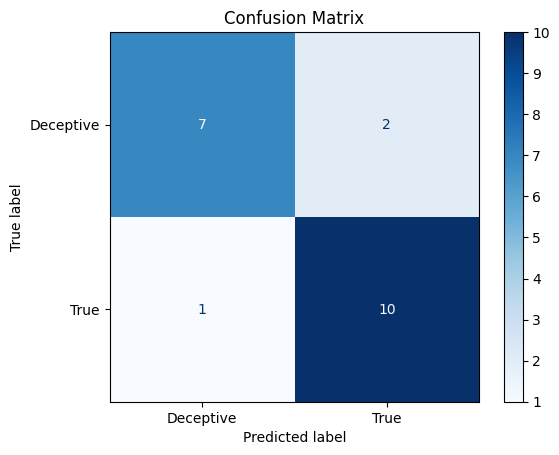

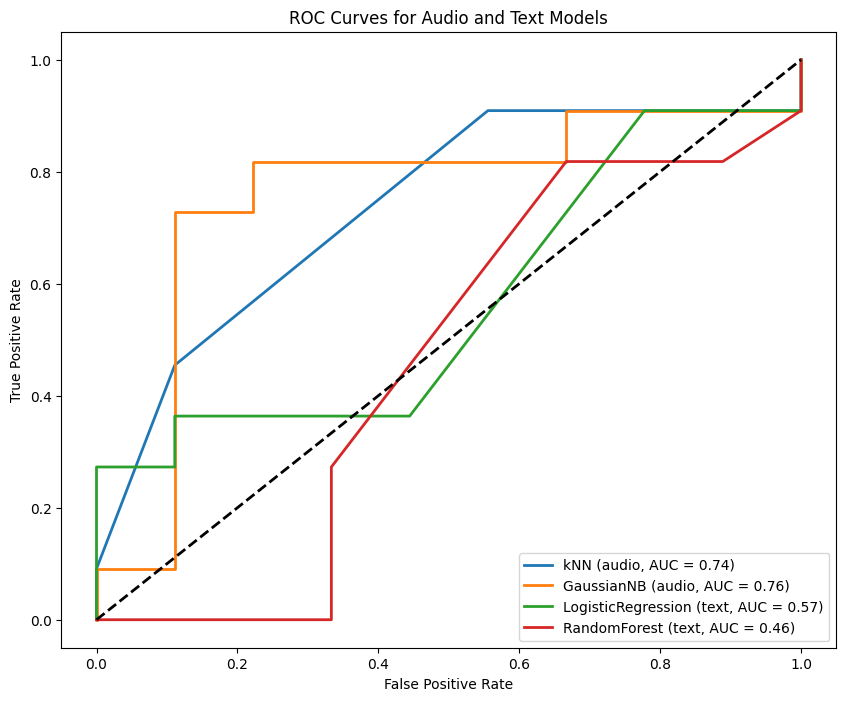

Saving model to trained_model.pkl


In [10]:
print("Training and evaluating models")
model_save_path = "trained_model.pkl"
train_and_evaluate(X_text, X_audio, labels, model_save_path)

#### 6.7.2 Predict

This section loads the pre-trained models.

In [11]:
# Run this block of code for predicting. You should put your prediction dataset in "predict" file, and make sure you have run the training block.
print("Start loading model")
model_load_path = "trained_model.pkl"
if os.path.exists(model_load_path) is False:
    print("Model does not exist")
    exit(0)
print("End loading model")

Start loading model
End loading model


This section loads the data that needs to be predicted and outputs the filenames of the read data. In this example, the prediction is performed using the files **00001.wav** and **00002.wav**.

In [20]:
# Use 00001.wav and 00002.wav.
print("Start loading data for prediction")
test_folder_path = "predict"
audio_files = [f for f in os.listdir(test_folder_path) if f.endswith(".wav")]
audio_files

Start loading data for prediction


['00001.wav', '00002.wav']

This section converts the data that needs to be predicted from audio to text format and outputs the results. From the output, we can see that the conversion quality is acceptable.

In [21]:
print("Start audio to text conversion")
texts = []
file_name = []
for file in audio_files:
    file_path = os.path.join(test_folder_path, file)
    file_name.append(file)
    output_text_path = os.path.join(test_folder_path, f"{file[:-4]}.txt")

    if os.path.exists(output_text_path):
        with open(output_text_path, "r") as f:
            text = f.read()
    else:
        text = audio_to_text(file_path, output_text_path)
    texts.append(text)
    
texts

Start audio to text conversion


['2021年的冬天,我回了一趟老家探望外婆,那年她身體不好,住在離村子不遠的小鎮醫院裡。冬天的風特別刺骨,我淚著一大兒她喜歡吃的水果,走進了醫院。外婆見到我時,臉上露出了久違的笑容。她說,你怎麼知道我最想吃的就是橙子。我們在病房裡聊了很多,我問她',
 '2022年属價,我終於實現了去雲南旅行的夢想雲南的美景和獨特文化一直是我向往的而這次旅行讓我深深感受到它的魅力最讓我難忘的是在R海邊騎行的一天那種自由和寧靜的感覺至今難忘清晨,我從大力古城租了一輛自行車沿著R海的湖邊小道騎行R海的水面在清晨十分如鏡子般平靜這次旅行,我從大力古城租了一輛自行車沿著R海的湖邊小道騎行R海的水面在清晨十分如鏡子般平靜的感覺沿著R海的水面在清晨十分如鏡子般平靜的感覺']

This section extracts the features from both the audio and text data and outputs the feature matrix.

In [22]:
print("Extract Text Features")
X_text = extract_text_features(texts)

print("Extract audio features")
X_audio = np.array([extract_audio_features(os.path.join(test_folder_path, file)) for file in audio_files])

X_text,X_audio

Extract Text Features
Extract audio features


(array([[0.2773501, 0.       , 0.2773501, 0.2773501, 0.2773501, 0.2773501,
         0.2773501, 0.2773501, 0.2773501, 0.2773501, 0.       , 0.       ,
         0.2773501, 0.       , 0.2773501, 0.2773501, 0.2773501],
        [0.       , 0.5      , 0.       , 0.       , 0.       , 0.       ,
         0.       , 0.       , 0.       , 0.       , 0.5      , 0.5      ,
         0.       , 0.5      , 0.       , 0.       , 0.       ]]),
 array([[-6.05132446e+02,  1.14067970e+02,  3.42377472e+01,
          2.65087910e+01,  1.41764011e+01, -8.32415760e-01,
         -2.44422957e-01,  1.98408210e+00,  3.51478124e+00,
          1.42658520e+00,  8.36694300e-01,  5.75649929e+00,
          2.37275743e+00,  5.76193989e-02,  4.47421800e-03],
        [-3.16850677e+02,  1.36820221e+02, -7.29796553e+00,
          3.91325798e+01,  1.15830936e+01, -1.96725762e+00,
         -9.38264561e+00,  1.46135693e+01, -4.95661879e+00,
         -1.58024426e+01,  1.32620287e+00, -1.10350657e+01,
         -4.75399303e+00,  

This section uses the pre-trained models to predict the data and outputs the prediction results, which are saved to a `.txt` file. The prediction results indicate that for file **00001.wav**, the content is classified as **True**, and for **00002.wav**, the content is classified as **False**. However, in reality, both files contain true stories, so the accuracy is 50%. Due to the small amount of prediction data, this result lacks statistical significance. To obtain more accurate results, please provide additional data and store it in the **predict** folder, located in the same directory as this file.

In [23]:
predictions = predict_with_model(model_load_path, X_text, X_audio)
with open("result.txt", "w") as f:
    for i in range(len(predictions)):
        print(f"Data: {file_name[i]}, Prediction: {predictions[i]}")
        f.write(f"Data: {file_name[i]}, Prediction: {predictions[i]}\n")
print("The result has been saved in result.txt")

Loading model from trained_model.pkl
Data: 00001.wav, Prediction: 1
Data: 00002.wav, Prediction: 0
The result has been saved in result.txt


## 7 Conclusion

In this project, we used the **MLEnd Deception Dataset** to build and evaluate a classification system that determines the authenticity of a story. By extracting both audio and text features and combining them with various machine learning models, we developed a robust system. The models were trained and evaluated separately on audio and text features, and the final predictions were fused using a weighted voting mechanism to improve accuracy and robustness.

#### **Conclusion**
1. **Advantages of Combining Audio and Text Features**:
   - This project validated that combining audio and text features can effectively improve classification accuracy. Audio features such as **MFCC**, **Zero Crossing Rate (ZCR)**, and **RMS energy** reflect the time-frequency characteristics of the audio signal, helping the model capture key information from speech.
   - Text features extracted using **TF-IDF** highlight critical information in the text, aiding the model in recognizing important words. This is particularly significant for determining the authenticity of a story.

2. **Effectiveness of the Ensemble Method**:
   - The use of a **weighted voting mechanism** to combine the predictions of different models proved effective in improving accuracy and reducing overfitting. By combining the predictions of both audio and text models, the final model showed better generalization and could better handle different types of samples.

3. **Model Performance**:
   - Through evaluating the model's **accuracy** and **confusion matrix** on the test set, and plotting the **ROC curve**, it is evident that the selected models achieved good classification performance on the small dataset. However, there is still room for improvement, especially when dealing with smaller datasets, where models can be influenced by noise and overfitting.

#### **Suggestions for Improvement**
1. **Dataset Expansion**:
   - The dataset used in this project is small (only 100 samples), which may limit the model's training effectiveness. In the future, it would be beneficial to use a larger **audio dataset** and **text dataset** or apply **data augmentation** techniques to expand the training set, thereby enhancing the model’s generalization ability.

2. **More Complex Models**:
   - Exploring more advanced **deep learning models**, such as **Convolutional Neural Networks (CNNs)** or **Recurrent Neural Networks (RNNs)**, could potentially improve performance when handling audio and text data, especially on larger datasets.

3. **Optimizing Feature Extraction**:
   - The feature extraction methods for both audio and text could be further optimized. For instance, audio features could be enhanced by adding **emotional features**, and more advanced text processing techniques (such as **BERT**, **GPT**, or other pre-trained models) could be used to better capture the nuances of the text, improving feature representation and model accuracy.

#### **Summary**
In this project, we successfully built a classification system based on both audio and text data that effectively determines the authenticity of a story. While the model performs well on the current dataset, there is still much room for improvement in terms of increasing the dataset size, optimizing features, and enhancing model complexity. By continuously refining the feature extraction methods, model selection, and data processing workflows, we aim to further improve the model’s classification performance and its practical application value.

## 8 References
[1] Manas Jain, Shruthi Narayan, Pratibha Balaji, etc. "Speech Emotion Recognition using Support Vector Machine," *arXiv*, 2020, Available: https://arxiv.org/abs/2002.07590.

[2] Alec Radford, Jong Wook Kim, Tao Xu, etc. "Robust Speech Recognition via Large-Scale Weak Supervision," *arXiv*, 2022, Available: https://arxiv.org/abs/2212.04356.

[3] Dong XB, Yu ZW,  Cao WM, etc. "A survey on ensemble learning," *FRONTIERS OF COMPUTER SCIENCE*, 2020, Available: https://libcon.bupt.e.cn/https/77726476706e69737468656265737421e7f2439321236b597b068aa9d6562f34899051d9fc85a85327/wos/woscc/full-record/WOS:000501015800001